## Elower grid error

In [1]:
import matplotlib.pyplot as plt
import numpy as np

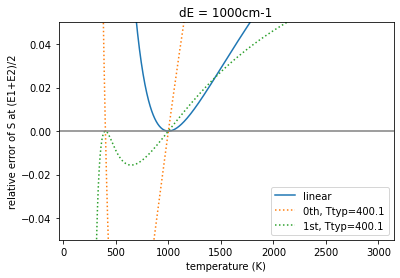

In [52]:
from exojax.utils.constants import hcperk, Tref_original

Tref = 1000
Ttyp1 = 400.1


def beta(T, Tref):
    return (hcperk * (1. / T - 1. / Tref))


def f(E, T, Tref):
    return np.exp(-beta(T, Tref) * E)

def error_zeroth_eq_analytic(T, Tref, dE):
    x = -beta(T, Tref) * dE / 2.0
    return 0.5 * (np.exp(x) + np.exp(-x))
    

def error_zeroth_analytic(T, Ttyp, Tref, dE):

    #    if Ttyp == Tref:
    #        x = -beta(T, Tref) * dE / 2.0
    #        return 0.5 * (np.exp(x) + np.exp(-x))
    #    else:
    alpha = beta(Ttyp, Tref)
    denom = np.exp(alpha * dE / 2.0) - np.exp(-alpha * dE / 2.0)
    num = (1.0 - np.exp(-alpha * dE / 2.0)) * np.exp(
        beta(T, Tref) * dE / 2.0) - (1.0 - np.exp(alpha * dE / 2.0)) * np.exp(
            -beta(T, Tref) * dE / 2.0)
    return num / denom


def error_first_analytic(T, Ttyp, Tref, dE):
    alpha = beta(Ttyp, Tref)
    facm = np.exp(alpha * dE / 2.0) - np.exp(-alpha * dE / 2.0)
    facp = 2.0 - (np.exp(alpha * dE / 2.0) + np.exp(-alpha * dE / 2.0))
    fac2 = np.exp(beta(T, Tref) * dE / 2.0) - np.exp(-beta(T, Tref) * dE / 2.0)

    return -dE / 2.0 * (alpha - beta(T, Tref)) * fac2 * facp / facm**2


def ds_first(Tarr, Ttyp1, Tref, dE):
    return error_zeroth_analytic(Tarr, Ttyp1, Tref, dE) + error_first_analytic(
        Tarr, Ttyp1, Tref, dE) - 1


#plt.plot(Tarr,x(Tarr,100))
Tarr = np.linspace(100, 3000, 1000)
#Ttyp2=00.0
dE = 1000
plt.plot(Tarr, error_zeroth_eq_analytic(Tarr, Tref, dE) - 1, label="linear")
plt.plot(Tarr,
         error_zeroth_analytic(Tarr, Ttyp1, Tref, dE) - 1,
         label="0th, Ttyp=" + str(Ttyp1),
         ls="dotted")
plt.plot(Tarr,
         ds_first(Tarr, Ttyp1, Tref, dE),
         label="1st, Ttyp=" + str(Ttyp1),
         ls="dotted")
plt.legend()
plt.ylim(-0.05, 0.05)
plt.title("dE = " + str(dE) + "cm-1")
plt.axhline(0.0, color="gray")

#plt.axvline(296.,ymax=0.25,color="red",alpha=0.2)
plt.xlabel("temperature (K)")
plt.ylabel("relative error of S at (E1+E2)/2")
plt.savefig("analytic_est.png")

In [118]:
N=3000
#Trefarr = np.linspace(100,2000,N)
#Ttyparr = np.linspace(100.1,2000.1,N)
#Tarr = np.linspace(100, 3000, N)
Ttyparr = np.logspace(np.log10(100.1),np.log10(2000.1),N)
Tarr = np.logspace(np.log10(100.), np.log10(3000.), N)

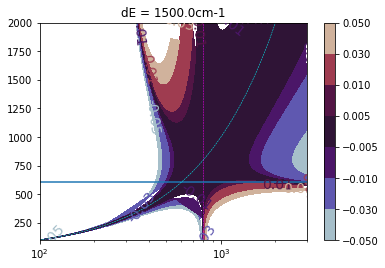

In [153]:
Tref=800.
dE=1500.
arr = []
for ttyp in Ttyparr:
    arr.append(ds_first(Tarr, ttyp, Tref, dE))
arr = np.array(arr).reshape(N, N)
#plt.imshow(arr,cmap="bwr")
co=plt.contourf(Tarr, Ttyparr, arr, levels=[-0.05,-0.03,-0.01,-0.005,0.005,0.01,0.03,0.05],cmap="twilight")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
plt.axhline(610)
plt.plot(Ttyparr,Ttyparr,color="cyan",lw=0.5, ls="dashed")
plt.title("dE = "+str(dE)+"cm-1")
plt.colorbar(co)
plt.xscale("log")

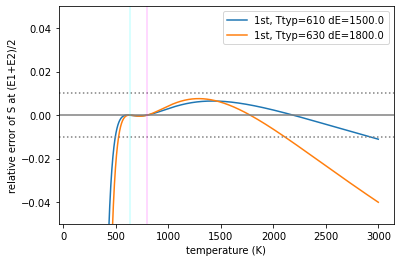

In [166]:
#Tref=800
Ttyp1 = 610
dE1 = 1500.
plt.plot(Tarr,
         ds_first(Tarr, Ttyp1, Tref, dE1),
         label="1st, Ttyp=" + str(Ttyp1) + " dE=" + str(dE1))
Ttyp1 = 630
dE1 = 1800.
plt.plot(Tarr,
         ds_first(Tarr, Ttyp1, Tref, dE1),
         label="1st, Ttyp=" + str(Ttyp1) + " dE=" + str(dE1))

plt.legend()
plt.ylim(-0.05, 0.05)

plt.axhline(0.0, color="gray")
plt.axhline(0.01, color="gray", ls="dotted")
plt.axhline(-0.01, color="gray", ls="dotted")
plt.axvline(Tref, color="magenta", lw=0.3)
plt.axvline(Ttyp1, color="cyan", lw=0.3)
#plt.xscale("log")
#plt.axvline(296.,ymax=0.25,color="red",alpha=0.2)
plt.xlabel("temperature (K)")
plt.ylabel("relative error of S at (E1+E2)/2")
plt.savefig("analytic_est.png")

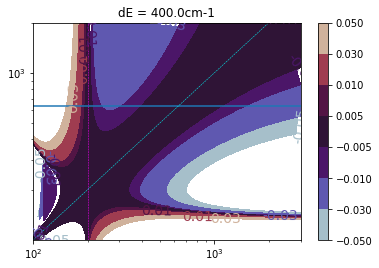

In [172]:
Tref=200.
dE=400.
arr = []
for ttyp in Ttyparr:
    arr.append(ds_first(Tarr, ttyp, Tref, dE))
arr = np.array(arr).reshape(N, N)
#plt.imshow(arr,cmap="bwr")
co=plt.contourf(Tarr, Ttyparr, arr, levels=[-0.05,-0.03,-0.01,-0.005,0.005,0.01,0.03,0.05],cmap="twilight")
co.clabel(fmt='%1.2f', fontsize=14)
plt.axvline(Tref,color="magenta",lw=0.5, ls="dashed")
plt.axhline(630)
plt.plot(Ttyparr,Ttyparr,color="cyan",lw=0.5, ls="dashed")
plt.title("dE = "+str(dE)+"cm-1")
plt.colorbar(co)
plt.xscale("log")
plt.yscale("log")

In [169]:
30000/1800, 30000/1500

(16.666666666666668, 20.0)